<a href="https://colab.research.google.com/github/ish66726-a11y/colab-notebooks/blob/main/notebooks/07%E3%83%96%E3%83%A9%E3%83%83%E3%82%AF%E3%82%B7%E3%83%A7%E3%83%BC%E3%83%AB%E3%82%BA%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7 ブラックショールズモデル

#7-1 ブラック＝ショールズモデル入門：リスク中立戦略とデルタヘッジ

これまで学んだ  
- ブラウン運動  
- 幾何ブラウン運動  
- 伊藤の補題（Ito’s Lemma）  
- 確率微分方程式（SDE）  

といった準備をもとに、**ブラック＝ショールズ（Black-Scholes）モデル** の直前までを整理する。

ブラック＝ショールズモデル（Black & Scholes, 1973）は、金融工学革命の中心にある理論であり、「オプション価格を満期前にどう評価するか？」という問題を解いた。

---

## 1. ブラック＝ショールズモデルの目的

オプションは「将来のある時点（満期 T）での価値」は明確に分かる。

- コール：$\max(S_T - K, 0)$  
- プット：$\max(K - S_T, 0)$  

しかし知りたいのは **T より前の時点（t < T）での価値**。

ブラック＝ショールズモデルの目的は：

>**満期前のオプション価格を理論的に決めること**

---

##2. 驚くべき発見：「リスク資産を組み合わせるとリスクが消える」

一般的な金融理論（モダンポートフォリオ理論、CAPM）は：

- 株価はランダムに動く  
- リスクは不可避  
- 分散投資で「銘柄固有のリスク」は消せるが、**市場全体のリスク（systematic risk）は消せない**

という前提だった。

しかし、ブラック＝ショールズモデでは次を示した：

> リスク資産を特定の割合で組み合わせると、市場リスクすら完全に消える（＝無リスク化）

これは非常に革命的だった。

---

## 3. オプション価格が依存する要素

オプション価格 $V(S, t)$ は複数の要因に依存する。

#### 変数（状態量）
- $S$: 基礎資産（株価）
- $t$: 時間

#### パラメータ（モデル特性）
- $\mu$: 株の期待成長率  
- $\sigma$: ボラティリティ  
- $K$: 権利行使価格（ストライク）  
- $T$: 満期  
- $r$: 無リスク金利  

---

## 4. コールオプションとプットオプションの性質

#### コール（Call）
- 権利：未来に **買う** 権利
- 価値：$S$ が上がるほど上昇  
  → **基礎資産と正の相関**

#### プット（Put）
- 権利：未来に **売る** 権利
- 価値：$S$ が下がるほど上昇  
  → **基礎資産と負の相関**

この「相関」がデルタヘッジの根幹となる。

---
## 5. リスクを消すための特別なポートフォリオ

ブラック＝ショールズが考えたのは、次のようなポートフォリオである：

$$
\Pi = V - \Delta S
$$

これは、

- **オプションをロング（買い）**
- **株式を $\Delta$ 単位ショート（売り）**

という組み合わせを意味する。

ここで重要なのは、コールオプションの場合、

- オプション価格 $V$ と株価 $S$ は**同じ方向に動く（正の相関）**

という点である。

この性質を利用し、適切な $\Delta$ を選ぶことで、
**オプション価格のランダムな変動を、
株式の反対売買によって完全に打ち消すことができる。**

このようなヘッジ戦略を**デルタヘッジ（Delta Hedging）** と呼ぶ。

なお、この $\Delta$ は、オプション価格の **株価に対する感応度（デルタ）** を表し、後に数学的に厳密に定義される。

その結果、

> **このポートフォリオは無リスクとなり、無リスク金利 $r$ で成長するはずである。**

ここから、ブラック＝ショールズ偏微分方程式が導かれる。

---
## 6.まとめ

- ブラック＝ショールズモデルの目的は「満期前のオプション価格」を決定すること  
- ランダムな価格変動を持つ株とオプションを組み合わせると、**リスクを完全に除去できる（デルタヘッジ）**  
- これは市場リスクすら消えるため、非常に革命的な発見  




##7-2 ブラック＝ショールズモデル：デルタヘッジによるリスク消去の仕組み

ポートフォリオの変化量とデルタヘッジの導出を詳しく解説する。

---

## 1. 前提：株価のモデル（幾何ブラウン運動）

基礎資産 $S(t)$ は次の確率微分方程式（SDE）に従う：

$$
dS = \mu S\, dt + \sigma S\, dW
$$

- $\mu S dt$：決定論的な平均成長  
- $\sigma S dW$：ランダム変動  
- $dW$：Wiener 過程の微小変化  

---

## 2. 特別なポートフォリオの構築

ブラック＝ショールズの核心は次の組み合わせ：

$$
\Pi = V - \Delta S
$$

- $V(S,t)$：オプション価格  
- $S$：基礎資産  
- $\Delta$：ショートする株数  

**オプションをロングし、株を $\Delta$ だけショートする。**

目標：

> **このポートフォリオのリスク（確率的成分）を完全に消すこと**

---

## 3. ポートフォリオの変化：$d\Pi$

ポートフォリオの微小変化は：

$$
d\Pi = dV - \Delta\, dS
$$

ここで、$V$ も $S$ も確率変数 → $dV$ を求めるために **伊藤の補題** が必要。

---
## 4. 伊藤の補題によるオプション価格の変化 $dV$ とポートフォリオの変化 $d\Pi$

オプション価格 $V(S,t)$ は株価 $S$ と時間 $t$ の関数であり、
株価が確率過程である以上、$V$ も確率過程となる。
したがって、その変化量 $dV$ を求めるには
**伊藤の補題（二変数版）**を用いる。

伊藤の補題より、

$$
dV
=
V_t\,dt
+
V_S\,dS
+
\frac{1}{2}V_{SS}(dS)^2
$$

が成り立つ。

ここで、株価 $S$ は次の SDE に従う：

$$
dS = \mu S\,dt + \sigma S\,dW
$$

この式を二乗し、微小項の大小関係を考えると、

- $(dt)^2$ および $dt\,dW$ は無視できる  
- ただし $(dW)^2 = dt$ は無視できない  

したがって、

$$
(dS)^2 \approx \sigma^2 S^2\,dt
$$

となる。

これを伊藤の補題の式に代入すると、

$$
dV
=
\left(
V_t + \mu S V_S + \frac{1}{2}\sigma^2 S^2 V_{SS}
\right)dt
+
\sigma S V_S\,dW
$$

を得る。
右端の $dW$ を含む項が、オプション価格の
**確率的なリスク成分**である。

次に、ポートフォリオ

$$
\Pi = V - \Delta S
$$

の微小変化を考える。
その変化量は

$$
d\Pi = dV - \Delta\,dS
$$

で与えられる。

ここに

$$
dS = \mu S\,dt + \sigma S\,dW
$$

を代入すると、

$$
\begin{aligned}
d\Pi
&=
\left(
V_t + \mu S V_S + \frac{1}{2}\sigma^2 S^2 V_{SS}
- \Delta \mu S
\right)dt
\\
&\quad+
\left(
\sigma S V_S - \Delta \sigma S
\right)dW
\end{aligned}
$$

となる。

---

## 5. 確率項の消去：デルタヘッジ
$$
\Delta = V_S
$$
とすると、
確率的成分（$dW$ の係数）は：

$$
\sigma S V_S - \Delta \sigma S= 0
$$
となり、完全にリスクが消える。これが **デルタヘッジ**である。

---

## 6. デルタヘッジの意味

- $\Delta = V_S$：オプション価格の株価に対する感応度  
- これだけ株をショートすると、オプションの確率変動と正確に相殺される  

つまり：

> **2つのリスク資産を組み合わせることで、リスクゼロの資産を「人工的に」作れる**

これがブラック＝ショールズの革命である。

---

## 7. デルタは「動的に」変化する

$\Delta = V_S$ は時間とともに必ず変わる。

- $S$ が変わる  
- $t$ が進む  
- $\sigma$ や他の条件も影響  

そのため：

> **ヘッジは常に調整されねばならない → 動的デルタヘッジ**




#7-3 ブラック＝ショールズ方程式（Black–Scholes PDE）への導出  
## 1. リスクを消した結果：ポートフォリオは完全に「確定的」になる

デルタヘッジ後のポートフォリオ：

$$
\Pi = V - \Delta S
$$

デルタ $\Delta = V_S$ を選ぶと、

$$
d\Pi \text{ から確率項 } dW \text{ が完全に消える}
$$

つまり：

> **このポートフォリオは “リスクゼロの資産” として振る舞う。**

---

## 2. ノーアービトラージ原理（No-Arbitrage Principle）

金融の基本原則：

> **リスクゼロの資産は、常にリスクフリー金利 $r$ で成長しなければならない。**

理由：

- リスクなしで市場平均以上の収益が得られたら  
  → 誰でも借金して投資し無限に儲けられてしまう  
- これは **アービトラージ（無リスク裁定）** であり  
  → 市場はそれを許さない（瞬時に解消される）

したがって、

$$
d\Pi = r \Pi\, dt
$$

でなければならない。

---

## 3. ポートフォリオの決定論的変化

前章の結果より、デルタヘッジ後の $d\Pi$ の決定論的成分は：

$$
d\Pi
=
\left( V_t
+ \frac12 \sigma^2 S^2 V_{SS}
+ \mu S V_S
- \Delta \mu S
\right) dt
$$

デルタ $\Delta = V_S$ を代入すると、$\mu$ の項が消える：

$$
d\Pi
=
\left(
V_t + \frac12 \sigma^2 S^2 V_{SS}
\right) dt
$$

---
## 4. ノーアービトラージ条件と結びつける

ポートフォリオ $\Pi = V - V_S S$ を使い、

$$
d\Pi = r \Pi\, dt
$$

すなわち：

$$
V_t + \frac12 \sigma^2 S^2 V_{SS}
=
r (V - S V_S)
$$

---
## 5. ブラック＝ショールズ偏微分方程式（Black–Scholes PDE）

式を整理すると：

$$
V_t + \frac12 \sigma^2 S^2 V_{SS}
+ r S V_S - r V = 0
$$

これは金融工学で最も重要な PDE の一つ、**ブラック＝ショールズ方程式**(Black–Scholes PDE)である。

---
## 6. なぜこの方程式は重要なのか？

- この PDE の解がヨーロピアン・オプション価格  
- 数学的に厳密に導かれたモデル  
- 市場が「裁定機会なし」であるための **唯一の価格** を与える  
- これに境界条件（満期でのペイオフ）を入れて解くと  
  → 有名な**ブラック＝ショールズ方程式の解析解**が得られる

---
## 7.まとめ

- デルタヘッジによりポートフォリオは確率項が消え、リスクゼロになる  
- ノーアービトラージ原理より、その成長率は必ず $r$  
- この条件を満たすことが、ブラック＝ショールズ PDE を強制する  
- PDE の解がオプション価格そのものになる  





#7-4 ブラック＝ショールズ方程式の解析解（Black–Scholes Closed-Form Solution）

## 1. ブラック＝ショールズ方程式

オプション価格 $V(S,t)$ は次の PDE を満たす：

$$
V_t + \frac12 \sigma^2 S^2 V_{SS} + r S V_S - r V = 0
$$

これは数学的には **放物型 PDE**。

> 代表例：熱方程式（heat equation）、拡散方程式（diffusion equation）

金融数学においても同じ数学構造が出てくる。

---
## 2. PDE を直接解く必要は実務では「ない」

ブラック＝ショールズ方程式の解法は高度な数学を含む：

- 伊藤積分
- 変数変換  
- 熱方程式への写像
- ガウス積分

しかし、**解析解**（closed-form solution）は非常にシンプルで、  
実務ではこれをそのまま使えばよい。

---
## 3. 標準正規分布 $N(x)$ の定義

ブラック＝ショールズ方程式の解析解では **標準正規分布の累積分布関数（CDF）** を使う：

$$
N(x) = \frac{1}{\sqrt{2\pi}}
\int_{-\infty}^{x} e^{-y^2 / 2} \, dy
$$

実装では NumPy や SciPy に含まれているので、自分で積分する必要はない。

---
## 4. 必要となるパラメータ $d_1$ と $d_2$

ブラック＝ショールズ方程式の解析解では、まず次の二つを計算する：

#### $d_1$ の定義

$$
d_1 =
\frac{
\ln\left(\frac{S}{K}\right)
+ \left(
r + \frac12 \sigma^2
\right)(T - t)
}{
\sigma \sqrt{T - t}
}
$$

#### $d_2$ の定義

$$
d_2 = d_1 - \sigma \sqrt{T - t}
$$

意味：

- $\ln(\frac{S}{K})$：現在の株価と行使価格の相対関係  
- $r$：無リスク金利  
- $\sigma$：ボラティリティ  
- $T-t$：満期までの時間  

---
## 5. コールオプション（Call）の価格

ブラック＝ショールズ方程式の解析解：

$$
C = S\, N(d_1) - K e^{-r(T - t)} N(d_2)
$$

---
## 6. プットオプション（Put）の価格

同様に、プットの価格は：

$$
P = K e^{-r(T - t)} N(-d_2) - S\, N(-d_1)
$$

---
## 7. まとめ

- ブラック＝ショールズ PDE は高度だが、最終解は単純  
- 標準正規分布の累積分布関数 $N(x)$ が重要  
- $d_1$,$d_2$ を計算し、コール/プット公式に代入するだけ  
- 実務ではこの closed-form solution がそのまま使われる  





#7-5 オプション価格の感応度指標 ― Greeks（グリークス）

Greeks は、オプション価格が何に対してどれだけ敏感かを測る尺度であり、  
ヘッジング・リスク管理・ポートフォリオ最適化で中心的な役割を果たす。

---

## 1. Delta $\Delta$（デルタ）

#### 定義  
デルタはオプション価格 $V$ の株価 $S$ に対する一次微分：

$$
\Delta = \frac{\partial V}{\partial S}
$$

意味：  
- **オプションの価格が、株価のわずかな変化に対してどれくらい変わるか**
- オプションの「株的感応度」

#### 重要な性質  
ブラック＝ショールズのデルタヘッジで登場したように：

> $\Delta$ を株のショート量として用いると、リスクが完全に消える（$dW$ が消える）

すなわち：

- ポートフォリオ  
  $\Pi = V - \Delta S$  
  の確率項を 0 にできる  
- デルタヘッジは **リスクの完全除去** を目的とした戦略

---

## 2. Gamma $\Gamma$（ガンマ）

#### 定義  
ガンマはオプション価格の二次微分：

$$
\Gamma = \frac{\partial^2 V}{\partial S^2}
$$

意味：

- **デルタが株価の変化に対してどれだけ変わるか（デルタの感応度）**
- デルタの変化率（カーブの強さ）

#### ガンマの役割  
- ガンマが大きいほど、デルタ値が急激に変動する  
- つまり **ヘッジの調整頻度が増える**
- デルタヘッジが「動的」でなければいけない理由

---

## 3. Theta $\Theta$（セータ）

#### 定義  
オプション価格の時間に対する微分：

$$
\Theta = \frac{\partial V}{\partial t}
$$

意味：

- **時間の経過によって、オプション価格がどれだけ減少するか**
- 特にオプションは時間価値を持つため、多くの場合 $\Theta < 0$

別名：  
- **タイムディケイ（Time decay）**

---

## 4. Vega（ベガ）

#### 定義  
ボラティリティ $\sigma$ に対する感応度：

$$
\text{Vega} = \frac{\partial V}{\partial \sigma}
$$

意味：

- **ボラティリティが変わるとオプション価格がどれだけ動くか**

ポイント：

- ボラティリティは市場予測で大きくブレる  
- そのため **ボラティリティリスクは非常に重要**

---

## 5. Rho $\rho$（ロー）（補足）

金利 $r$ に対する感応度：

$$
\rho = \frac{\partial V}{\partial r}
$$

金利変化がオプション価格に与える影響を示す。

---

## 6. ブラック＝ショールズ PDE を Greeks で書き換える

ブラック＝ショールズ PDE：

$$
V_t + \frac12\sigma^2 S^2 V_{SS} + r S V_S - rV = 0
$$

Greeks を用いると：

- $V_t = \Theta$  
- $V_S = \Delta$  
- $V_{SS} = \Gamma$

これにより、

$$
\Theta + \frac12 \sigma^2 S^2 \Gamma + r S \Delta - rV = 0
$$

このように、PDE を「Greeks の組み合わせ」として表現できる。

---

## 7. Greeks のまとめ

| Greek | 数式 | 意味 |
|-------|------|------|
| $\Delta$ | $\frac{\partial V }{ \partial S}$ | 株価への感応度（一次） |
| $\Gamma$ | $\frac{\partial^2 V}{\partial S^2}$ | デルタの感応度（二次） |
| $\Theta$ | $\frac{\partial V}{\partial t}$ | 時間経過の影響（タイムディケイ） |
| Vega | $\frac{\partial V}{\partial \sigma}$ | ボラティリティの影響 |
| $\rho$ | $\frac{\partial V}{\partial r}$ | 金利の影響 |

---




# 7-6 Black–Scholes モデルで「どう使い、どう利益につなげるか」

ここまでで、ブラック＝ショールズモデルは、オプション価格を理論的に決定する枠組みであることを学んだ。

では、このモデルは実務や投資において **どのように使われ、どのように利益や価値を生むのか** を整理する。

---

## 1. Black–Scholes モデルの本質的な用途

まず重要なのは、**Black–Scholes モデルの主目的は「儲け」ではない** という点である。

プロ投資家・金融機関にとっての最大の用途は：

- リスクの定量化  
- ヘッジ比率（Delta・Gamma など）の計算  
- ポートフォリオ全体のリスク制御  

である。

例として：

- 毎日 Greeks を計算し、ヘッジ量を調整  
- 市場変動に対してポジションを中立化  
- 想定外のリスク暴露を防ぐ  

つまり、Black–Scholes モデルは利益を最大化する道具というより、損失を制御するための基盤として使われることが多い。

---

## 2. それでも「利益機会」はどこにあるのか？

Black–Scholes モデルが与えるのは、オプションの理論価格（フェアバリュー）である。

この理論価格と市場価格のズレが、利益機会の源泉となる。

---

## 3. 利益戦略①：ミスプライス（誤価格）の発見

市場で取引されているオプション価格 $P_{\text{market}}$ と Black–Scholes が与える理論価格 $P_{\text{BS}}$ が異なる場合：

$$
P_{\text{market}} \neq P_{\text{BS}}
$$

そこには **ミスプライス（誤価格）** が存在する。

- 市場価格が理論価格より安い  
  → 割安なので **買い**  
- 市場価格が理論価格より高い  
  → 割高なので **売り（またはショート）**

多くのオプショントレーダーは、ブラック＝ショールズを基準に 「どれくらいズレているか」を常時監視している。

---

## 4. 利益戦略②：インプライド・ボラティリティ（IV）の歪み

市場では、同じ銘柄でも：

- 満期の違い  
- ストライクの違い  
- コールとプットの違い  

によって、 インプライド・ボラティリティ（IV）に歪みが生じる。

例：

- コールとプットで IV が不自然に異なる  
- 特定の満期だけ IV が極端に高い  

こうした歪みを利用して：

- IV が低いオプションを買う  
- IV が高いオプションを売る  

という **ボラティリティ取引** が可能になる。

---

## 5. 利益戦略③：統計的・構造的アービトラージ

Black–Scholes モデルを基準にすると：

- 複数オプション間の価格関係  
- 理論的に成り立つべき制約  

が明確になる。
これを利用し、

- モデル価格と市場価格の乖離  
- オプション同士の価格関係の不整合  

を統計的に検出して利益を狙う戦略も存在する。

これは、株式のペアトレードや他市場での統計的裁定取引と同じ発想である。

---

## 6. 株式投資との違い

株式投資では基本的に：

- 上がると思えば買う  
- 下がると思えば売る  

という **方向性の予測** が中心となる。

一方オプションでは：

- 価格が「適正かどうか」を判断できる  
- ボラティリティそのものを取引できる  
- リスクを精密に分解・管理できる  

という点で、より多次元的な戦略が可能となる。

---

## 7. Black–Scholes モデルの活用まとめ

| 活用方法 | 内容 |
|---------|------|
| リスク管理 | Greeks を用いたヘッジ |
| ミスプライス検出 | 理論価格と市場価格の差 |
| IV 取引 | ボラティリティの歪み利用 |
| 統計的裁定 | オプション間の価格関係 |
| 戦略設計 | 定量的な意思決定基盤 |

---

## 8. まとめ

Black–Scholes モデルは、

- オプションの「正しい価値」を与え  
- リスクを数値として可視化し  
- 価格の歪みを検出する基準点となる  

その結果、

> **数学とプログラミングを使って、市場と戦うための共通言語**

として機能する。

このモデルを理解することは、単なる理論の習得ではなく、**定量的に市場を捉える思考法そのもの**を身につけることに等しい。


#7-8 ブラック＝ショールズモデル実装（Python）  
この章では、ブラック＝ショールズモデルの理論背景を踏まえつつ、**Python によるブラック＝ショールズ方程式の実装**を行う。

SciPy の正規分布関数を利用することで、数学的な導出の複雑さを意識せずとも、シンプルに実装できることがポイント。

---

## 1. 必要ライブラリの読み込み

ブラック＝ショールズモデルの公式は、正規分布の累積分布関数（CDF）を使用するため、SciPy の `stats.norm.cdf` を使う。また NumPy の `log`, `exp`, `sqrt` も利用する。

---

## 2. d1, d2 の計算式

ブラック＝ショールズモデルでは、まず以下の 2 つの値を計算する：

 $$d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}}$$

 $$d_2 = d_1 - \sigma\sqrt{T}$$

ここで  

- $S$ … 現在の株価  
- $K$ … 権利行使価格（ストライク）  
- $T$ … 残存期間（年）  
- $r$ … 無リスク金利  
- $\sigma$ … ボラティリティ  

---

## 3. ブラック＝ショールズ方程式の解析解

ブラック＝ショールズのコール価格公式：

$$C = S\,N(d_1)\;-\;K e^{-rT} N(d_2)$$



ブラック＝ショールズのプット価格公式：

$$P = K e^{-rT} N(-d_2)\;-\;S\,N(-d_1)$$


---
## 4. Python実装例：オプション価格の計算






In [2]:
from scipy import stats
from numpy import log, exp, sqrt

def call_option_price(S, K, T, r, sigma):

    d1 = (log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)

    # コールオプション価格
    call = S * stats.norm.cdf(d1) - K * exp(-r * T) * stats.norm.cdf(d2)
    return call

def put_option_price(S, K, T, r, sigma):
    d1 = (log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)

    put = K * exp(-r * T) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)
    return put

if __name__ == "__main__":
    S = 100      # 現在の株価
    K = 100      # ストライク
    T = 1        # 残存期間（1年）
    r = 0.05     # 金利5%
    sigma = 0.20 # ボラティリティ20%

    call = call_option_price(S, K, T, r, sigma)
    put = put_option_price(S, K, T, r, sigma)

    print("d1 and d2 are calculated internally.")
    print(f"Black–Scholes Call Price = {call:.4f}")
    print(f"Black–Scholes Put Price  = {put:.4f}")

d1 and d2 are calculated internally.
Black–Scholes Call Price = 10.4506
Black–Scholes Put Price  = 5.5735


---

## 5. 動作確認（他サイトとの一致）

GoodCalculators などのオンライン計算ツールで同じ値を計算すると次と一致する：

- **Call ≈ 10.45**
- **Put  ≈ 5.57**

これにより、実装が正しく機能していることが確認できる。

---

## 6. ブラック＝ショールズモデルが強力な理由

数学的導出は  

- 確率微分方程式 (SDE)  
- 幾何ブラウン運動  
- Ito の補題  
- PDE（偏微分方程式）

など高度な内容が含まれるが、

**実際の実装はわずか数行で済む。**

だからこそ、実務の現場ではブラック＝ショールズは非常に強力で使われ続けている。

---

## 7. まとめ

- $d_1$、$d_2$ の計算が最初のステップ  
- SciPy により正規分布は自前実装不要  
- Python でコール/プット価格が簡潔に実装できる  
- 複雑な数学的背景を意識せず利用可能  
- 実務的にも非常に使われる標準モデル  




# 7-9 モンテカルロシミュレーションの理論背景

## 1. モンテカルロ法とは？

モンテカルロ法は 1940 年代、
**マンハッタン計画（Los Alamos）** において、
複雑すぎる核物理の問題を
「確率的手法」で解くために開発された方法である。

**ポイント**
- 解析解が存在しない、または求めるのが困難な問題を  **ランダムサンプリング（乱数）** によって数値的に近似する
- 「確率的アプローチで決定論的な量を評価する」方法

---

## 2. 例：円の面積をモンテカルロで求める

通常、円の面積は

$$
A = \pi r^2
$$

で求められるが、モンテカルロ法では次のように推定できる。

1. 正方形（$[-r,r]\times[-r,r]$）内に乱数で点を大量に打つ  
2. そのうち「円の内部に入った点」の割合を求める  
3.  
$$
\text{円の面積}
\approx
(2r)^2 \times
\frac{\text{円内の点数}}{\text{全点数}}
$$

πや解析的な公式を使わず、
**確率と乱数だけで面積を推定できる**点が
モンテカルロ法の本質である。

---

## 3. 基本原理

- 不確定な事象を多数生成し、その平均で期待値を近似する  
- 試行回数 $N$ が大きいほど精度は向上する  
- 少ない試行では誤差が大きい（大数の法則）

---

## 4. 株価推定への応用

株価は近似的に
**幾何ブラウン運動（GBM）** に従うと仮定される：

$$
dS(t) = \mu S(t)\,dt + \sigma S(t)\,dW(t)
$$

このモデルのもとでは、将来の株価は
**1つの値ではなく確率分布**として表される。

---

## 5. モンテカルロによる株価シミュレーションの考え方

1 回のシミュレーションは
**1 本の株価パス**に対応する。

これを大量に繰り返すことで：

- 将来株価の分布  
- 期待値・分散・分位点  
- オプションの期待ペイオフ  

などを評価できる。

---

## 6. 実際の流れ

1. 初期株価 $S_0$ を決める  
2. 歴史データから  
   $\mu$（平均リターン）と  
   $\sigma$（ボラティリティ）を推定  
3. GBM に従って **1 本のランダムパス** を生成  
4. これを **数万回繰り返す**  
5. 得られた分布から期待値やリスク指標を評価する

---

## 7. まとめ

- モンテカルロ法は乱数を使って複雑な問題を近似する方法  
- 核物理から金融工学まで幅広く利用されている  
- 株価は確率過程であり、モンテカルロ法と相性が良い  
- 将来の「値」ではなく、**将来の「分布」を評価できる**点が最大の強み


# 7-10 モンテカルロ法による将来株価シミュレーション

## 1. 株価モデル：幾何ブラウン運動（GBM）

株価 $S(t)$ は次の確率微分方程式（SDE）でモデル化される：

$$
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t
$$

- $\mu$：ドリフト（期待成長率）
- $\sigma$：ボラティリティ
- $W_t$：ウィーナー過程（ブラウン運動）

この SDE の解析解は：

$$
S(t) = S_0 \exp\left[\left(\mu - \frac{1}{2}\sigma^2\right)t + \sigma W_t\right]
$$

---

## 2. シミュレーションの考え方

モンテカルロ法では、

- **GBM の株価パス（未来のシナリオ）を大量に生成**し
- **将来株価の分布（期待値・分散・分位点など）を評価**する

ことで、不確実な将来を数値的に扱う。

1本のパスは離散化により次で生成できる（$\Delta t = 1$ とする）：

$$
S_{t+1} = S_t \exp\left[\left(\mu - \frac12 \sigma^2\right) + \sigma Z\right],
\quad
Z \sim \mathcal{N}(0,1)
$$

※ 平均パスは $\mathbb{E}[S_t]$（期待値）を表すが、
「最も起こりやすい経路（最頻値）」と一致するとは限らない点に注意する。

---

## 3. Python実装例：モンテカルロ株価シミュレーション

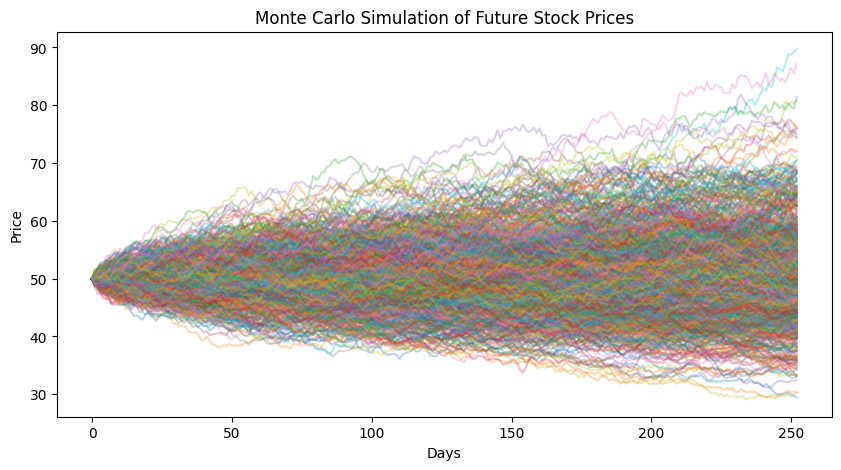

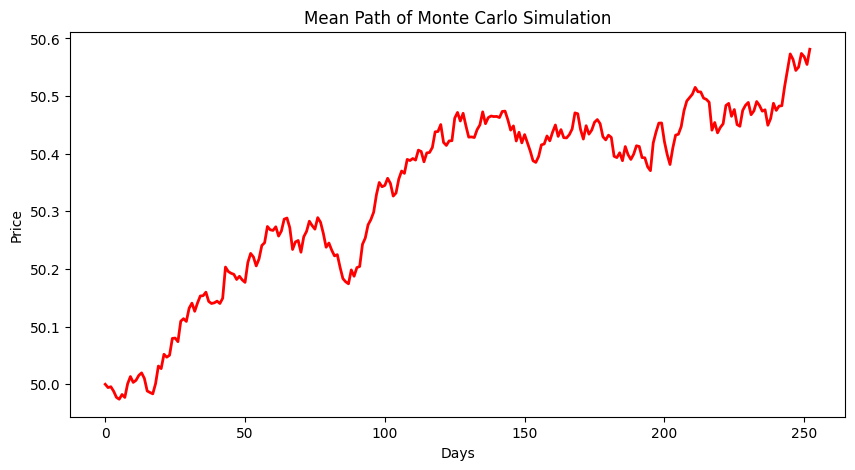

Prediction for future stock price after 1 year: $50.58


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Monte Carlo Stock Price Simulation ---
NUM_SIMULATIONS = 1000

def stock_montecarlo(S0, mu, sigma, n_days, sims=NUM_SIMULATIONS):
    """
    幾何ブラウン運動による株価のモンテカルロシミュレーション
    S0 : 初期株価
    mu : 平均リターン
    sigma : ボラティリティ
    n_days : 生成する日数
    sims : シミュレーション回数
    """
    results = []

    for _ in range(sims):
        prices = [S0]

        for _ in range(n_days):
            prev_price = prices[-1]

            # 1日のGBMモデル → dt = 1 と仮定
            next_price = prev_price * np.exp(
                (mu - 0.5 * sigma**2) + sigma * np.random.normal(0, 1)
            )
            prices.append(next_price)

        results.append(prices)

    df = pd.DataFrame(results).T  # 列＝シミュレーション1本
    return df


# --- メイン処理 ---
if __name__ == "__main__":
    S0 = 50        # 初期株価
    mu = 0.00002   # 平均リターン（小さい値）
    sigma = 0.01   # ボラティリティ
    n_days = 252   # 1年分の取引日数

    sim_data = stock_montecarlo(S0, mu, sigma, n_days)

    # すべてのパスをプロット
    sim_data.plot(legend=False, figsize=(10,5), alpha=0.3)
    plt.title("Monte Carlo Simulation of Future Stock Prices")
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.show()

    # 平均パスを計算
    sim_data["mean"] = sim_data.mean(axis=1)

    # 平均パスをプロット
    sim_data["mean"].plot(figsize=(10,5), color="red", linewidth=2)
    plt.title("Mean Path of Monte Carlo Simulation")
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.show()

    # 1年後の株価予測
    prediction = sim_data["mean"].iloc[-1]
    print(f"Prediction for future stock price after 1 year: ${prediction:.2f}")

---

## 4. シミュレーション結果の見方

- **細い線**：多数の株価パス（将来の不確実なシナリオ）
- **平均線（mean）**：各時点の期待値 $\mathbb{E}[S_t]$
- **重要なのは「1本の予測」ではなく「分布」**
  - 例：1年後の平均
  - 例：中央値（50%点）
  - 例：5%・95%分位点（下振れ／上振れの範囲）

---

## 5. この方法の利点と注意点

### 利点
- 解析的に解けない問題も数値的に近似できる  
- $\sigma$ を変えることでリスクシナリオを作れる  
- Black–Scholes と同じ GBM 仮定のもとで整合的に議論できる  

### 注意点
- $\mu$ と $\sigma$ の推定に強く依存する  
- 出力は「確率分布」であり、保証された予測ではない  
- 試行回数を増やすと精度は上がるが計算量も増える  

---

## 6. まとめ

- 株価は GBM でモデル化できる  
- 解析解（指数形）を使えばモンテカルロシミュレーションが可能  
- モンテカルロは「未来の1本の線」ではなく、**未来の分布（期待値・分位点・リスク）を評価する手法**である  
- Python では数十行で実装できる

#7-11 モンテカルロ法によるオプション価格計算の準備（理論編）

「将来の株価をモンテカルロ法で推定する方法」を説明した。  
今回の内容は **オプション価格のモンテカルロ計算** に進むための理論的準備となる。

---
## 1. 基本アイデア：将来の株価が必要

オプション価格は、将来の株価に依存する。

- コールオプション：$\max(S_T - K, 0)$  
- プットオプション：$\max(K - S_T, 0)$  

ここで $S_T$ は **満期 $T$ の株価**。

よって **Monte Carlo Simulation で $S_T$ を大量に生成する必要がある**。

---

## 2. 株価のモデル：幾何ブラウン運動（GBM）

株価は次の **確率微分方程式（SDE）** に従うと仮定：

$$
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t
$$

この解は **指数関数（ログ正規分布）** になり：

$$
S_T = S_0 \exp\!\left[
\left( \mu - \frac12\sigma^2 \right)T
+ \sigma \sqrt{T} Z
\right]
$$

ここで $Z \sim N(0,1)$。

---

## 3. リスク中立化：$\mu$ を $r$ に置き換える

ブラック–ショールズの考え方では、

- 現実世界の平均リターン $\mu$  
  （企業成長、投資家期待など）

ではなく、

- **リスクフリーレート $r$**

を使う必要がある（リスク中立測度）。

従って、計算に使う式は：

$$
S_T = S_0 \exp\!\left[
\left( r - \frac12\sigma^2 \right)T
+ \sigma \sqrt{T} Z
\right]
$$

---

## 4. Monte Carlo でやること

満期における株価 $S_T$ を多数生成する：
```python
for i in range(N_simulations):
    Z = 標準正規乱数
    S_T[i] = S0 * exp((r - 0.5σ²)T + σ√T Z)
```

コールオプション:
$$
P_i = \max(S_T^{(i)} - K,\; 0)
$$

プットオプション:
$$
P_i = \max(K - S_T^{(i)},\; 0)
$$

---

## 5. 割引して現在価値にする

未来のキャッシュフローを現在価値へ割り引く：

$$
C_0 = e^{-rT} \cdot \frac{1}{N}\sum_{i=1}^N \text{Payoff}_i
$$

 これが Monte Carlo によるオプション価格。

---

## 6. なぜ Monte Carlo が必要か？

- ブラック–ショールズ解析解が使えないケースに対応（例：アメリカンオプション）
- ペイオフが非線形でも問題なし
- パス依存型（Asian, Barrier, Lookback など）にも適用可能  

**→ 複雑な条件付きデリバティブでは Monte Carlo が標準ツール**

---

## 7. まとめ

- 株価は **GBM（幾何ブラウン運動）** でモデル化される  
- リスク中立測度では **平均リターン $\mu$ → 金利 $r$** に置換  
- Monte Carlo で大量の $S_T$ を生成  
- ペイオフを計算し、割引平均して **現在価値＝オプション価格** を得る  

# 7-12 Monte Carlo によるオプション価格シミュレーション（Call / Put）

## 1. 株価モデル（GBM の解析解）

株価はリスク中立測度のもとで、次の幾何ブラウン運動に従うと仮定する：

$$
S_T = S_0 \exp\left[(r - \tfrac{1}{2}\sigma^2)T + \sigma\sqrt{T}\,Z\right],
\quad Z \sim N(0,1)
$$

---

## 2. コールとプットのペイオフ

満期時のペイオフは以下で定義される：

- コールオプション  
$$
\text{Payoff}_{\text{Call}} = \max(S_T - K,\;0)
$$

- プットオプション  
$$
\text{Payoff}_{\text{Put}} = \max(K - S_T,\;0)
$$

両者の違いは **ペイオフ関数のみ**であり、  
株価モデル・割引方法は完全に同一である。

---

## 3. Monte Carlo による価格評価

オプション価格は、満期ペイオフの期待値を
無リスク金利で割引することで得られる：

$$
V_0 = e^{-rT} \mathbb{E}[\text{Payoff}]
$$

Monte Carlo 法では、この期待値を
**大量の乱数サンプルの平均**で近似する。

---

## 4. Python 実装例：Monte Carlo によるオプション価格シミュレーション（Call / Put）





In [ ]:
import numpy as np

class OptionPricing:
    def __init__(self, S0, K, T, r, sigma, iterations):
        self.S0 = S0          # 初期株価
        self.K = K            # ストライク
        self.T = T            # 満期
        self.r = r            # 無リスク金利
        self.sigma = sigma    # ボラティリティ
        self.iter = iterations

    # --- コールオプション ---
    def call_option_simulation(self):
        # 標準正規乱数
        Z = np.random.normal(0, 1, self.iter)

        # GBM による S_T の生成
        S_T = self.S0 * np.exp(
            (self.r - 0.5 * self.sigma**2) * self.T
            + self.sigma * np.sqrt(self.T) * Z
        )

        # コールのペイオフ
        payoff = np.maximum(S_T - self.K, 0)

        # 割引して現在価値へ
        price = np.exp(-self.r * self.T) * np.mean(payoff)
        return price

    # --- プットオプション ---
    def put_option_simulation(self):
        # 標準正規乱数
        Z = np.random.normal(0, 1, self.iter)

        # 将来株価 S_T を生成
        S_T = self.S0 * np.exp(
            (self.r - 0.5 * self.sigma**2) * self.T
            + self.sigma * np.sqrt(self.T) * Z
        )

        # プットのペイオフ（唯一の違い）
        payoff = np.maximum(self.K - S_T, 0)

        # 現在価値に割引
        price = np.exp(-self.r * self.T) * np.mean(payoff)
        return price


# --- メイン処理 ---
if __name__ == "__main__":
    model = OptionPricing(
        S0=100,     # 初期株価
        K=100,      # ストライク
        T=1,        # 満期1年
        r=0.05,     # 無リスク金利 5%
        sigma=0.2,  # ボラティリティ
        iterations=10000  # シミュレーション回数
    )

    call_price = model.call_option_simulation()
    put_price = model.put_option_simulation()

    print(f"Call Option Price  = ${call_price:.2f}")
    print(f"Put Option Price   = ${put_price:.2f}")

---    
## 5. 出力例（典型値）

Call Option Price  = 10.05

Put Option Price   = 5.40

（※ シミュレーション回数を増やすと、ブラック＝ショールズ解析解に収束する）

---

## 6. まとめ

- コールとプットの違いは **ペイオフ関数のみ**
- 株価は GBM に従うと仮定する
- Monte Carlo 法では $S_T$ を大量に生成する
- ペイオフの平均を取り、$e^{-rT}$ で割引することで  
  **現在のオプション価格** が得られる
